<a href="https://colab.research.google.com/github/sathwika2005/ML_Project/blob/main/Titanic_Survival_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from prettytable import PrettyTable

# Load the Titanic dataset
file_path = 'Titanic-Dataset.csv'
titanic_df = pd.read_csv(file_path)

# Select features and target
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

# Handle missing values by filling them with the mean of the column
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].mean(), inplace=True)

# Define the feature matrix and target vector
X = titanic_df[features]
y = titanic_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = gnb.predict(X_test)

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)

# Display the accuracy
print(f"The accuracy of the Gaussian Naive Bayes model is: {accuracy:.4f}")

# Predict the conditional probabilities
probabilities = gnb.predict_proba(X_test)

# Function to display conditional probabilities for each feature
def display_conditional_probabilities(X, probabilities, feature_names, class_names):
    # Calculate overall probabilities for each class
    overall_probs = probabilities.mean(axis=0)
    overall_probs_table = PrettyTable()
    overall_probs_table.field_names = ["Class", "Probability"]
    for i, class_name in enumerate(class_names):
        overall_probs_table.add_row([class_name, f"{overall_probs[i]:.4f}"])

    # Display overall probabilities
    print("Overall probabilities for each class:\n")
    print(overall_probs_table)
    print("\n")

    # Display conditional probabilities for each feature
    for feature in feature_names:
        feature_table = PrettyTable()
        feature_table.field_names = [feature] + [f"P({class_name})" for class_name in class_names]
        for i, value in enumerate(X[feature]):
            row = [f"{value:.4f}"]
            row.extend([f"{probabilities[i, j]:.4f}" for j in range(len(class_names))])
            feature_table.add_row(row)

        print(f"Conditional probabilities for {feature}:\n")
        print(feature_table)
        print("\n")

# Display conditional probabilities for each feature
display_conditional_probabilities(X_test, probabilities, features, ['Not Survived', 'Survived'])

# Function to predict class for user input
def predict_class(user_input):
    # Convert user input to a DataFrame
    input_data = pd.DataFrame([user_input], columns=features)

    # Predict the class
    predicted_class = gnb.predict(input_data)
    predicted_class_name = 'Survived' if predicted_class[0] == 1 else 'Not Survived'

    return predicted_class_name

# Get user input
print("Please enter the following feature values for classification:")
user_input = []
for feature in features:
    value = float(input(f"Enter {feature} (e.g., 3 for Pclass, 25 for Age): "))
    user_input.append(value)

# Predict and display the class
predicted_class_name = predict_class(user_input)
print(f"\nThe predicted class based on your input is: {predicted_class_name}")


The accuracy of the Gaussian Naive Bayes model is: 0.6978
Overall probabilities for each class:

+--------------+-------------+
|    Class     | Probability |
+--------------+-------------+
| Not Survived |    0.6340   |
|   Survived   |    0.3660   |
+--------------+-------------+


Conditional probabilities for Pclass:

+--------+-----------------+-------------+
| Pclass | P(Not Survived) | P(Survived) |
+--------+-----------------+-------------+
| 3.0000 |      0.8368     |    0.1632   |
| 2.0000 |      0.7285     |    0.2715   |
| 3.0000 |      0.8208     |    0.1792   |
| 2.0000 |      0.4932     |    0.5068   |
| 3.0000 |      0.8043     |    0.1957   |
| 1.0000 |      0.1185     |    0.8815   |
| 3.0000 |      0.8460     |    0.1540   |
| 3.0000 |      0.9407     |    0.0593   |
| 3.0000 |      0.8018     |    0.1982   |
| 1.0000 |      0.3894     |    0.6106   |
| 1.0000 |      0.3231     |    0.6769   |
| 3.0000 |      0.8424     |    0.1576   |
| 3.0000 |      0.9952     |   

In [ ]:
#decision tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable

# Load the Titanic dataset
file_path = 'Titanic-Dataset.csv'
titanic_df = pd.read_csv(file_path)

# Select features and target
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

# Handle missing values by filling them with the mean of the column
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].mean(), inplace=True)

# Define the feature matrix and target vector
X = titanic_df[features]
y = titanic_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pred = dtc.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree classifier: {accuracy:.4f}")

# Function to predict class for user input
def predict_class(user_input):
    # Convert user input to a DataFrame
    input_data = pd.DataFrame([user_input], columns=features)

    # Predict the class
    predicted_class = dtc.predict(input_data)
    predicted_class_name = 'Survived' if predicted_class[0] == 1 else 'Not Survived'

    return predicted_class_name

# Get user input
print("Please enter the following feature values for classification:")
user_input = []
for feature in features:
    value = float(input(f"Enter {feature} (e.g., 3 for Pclass, 25 for Age): "))
    user_input.append(value)

# Predict and display the class
predicted_class_name = predict_class(user_input)
print(f"\nThe predicted class based on your input is: {predicted_class_name}")


Accuracy of the Decision Tree classifier: 0.6418
Please enter the following feature values for classification:
Enter Pclass (e.g., 3 for Pclass, 25 for Age): 3
Enter Age (e.g., 3 for Pclass, 25 for Age): 22
Enter SibSp (e.g., 3 for Pclass, 25 for Age): 1
Enter Parch (e.g., 3 for Pclass, 25 for Age): 0
Enter Fare (e.g., 3 for Pclass, 25 for Age): 7.25

The predicted class based on your input is: Not Survived


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
file_path = 'Titanic-Dataset.csv'
titanic_df = pd.read_csv(file_path)

# Select features and target
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

# Handle missing values by filling them with the mean of the column
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].mean(), inplace=True)

# Define the feature matrix and target vector
X = titanic_df[features]
y = titanic_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the classifiers
dtc = DecisionTreeClassifier(random_state=42)
gnb = GaussianNB()

# Fit the models on the training data
dtc.fit(X_train, y_train)
gnb.fit(X_train, y_train)

# Randomly select 10 instances from the dataset
random_instances = X_test.sample(n=10, random_state=42)
random_actuals = y_test.loc[random_instances.index]

# Predict the class and probability for each instance using both classifiers
for i, (index, instance) in enumerate(random_instances.iterrows(), start=1):
    # Convert instance to DataFrame to maintain feature names
    instance_df = pd.DataFrame([instance], columns=features)

    # Decision Tree prediction
    dtc_pred = dtc.predict(instance_df)
    dtc_correct = 'Correct' if dtc_pred[0] == random_actuals.loc[index] else 'Wrong'

    # Naive Bayes prediction
    gnb_pred = gnb.predict(instance_df)
    gnb_correct = 'Correct' if gnb_pred[0] == random_actuals.loc[index] else 'Wrong'

    # Calculate accuracy of both classifiers on the entire test set
    dtc_accuracy = accuracy_score(y_test, dtc.predict(X_test))
    gnb_accuracy = accuracy_score(y_test, gnb.predict(X_test))

    # Display the results in the desired format
    print(f"Sample {i}: {dtc_correct} (Decision Tree) / {gnb_correct} (Naive Bayes)")
    print(f"  Naive Bayes Accuracy: {gnb_accuracy:.2f}")
    print(f"  Decision Tree Accuracy: {dtc_accuracy:.2f}")
    print("\n")


Sample 1: Correct (Decision Tree) / Correct (Naive Bayes)
  Naive Bayes Accuracy: 0.70
  Decision Tree Accuracy: 0.64


Sample 2: Correct (Decision Tree) / Correct (Naive Bayes)
  Naive Bayes Accuracy: 0.70
  Decision Tree Accuracy: 0.64


Sample 3: Wrong (Decision Tree) / Wrong (Naive Bayes)
  Naive Bayes Accuracy: 0.70
  Decision Tree Accuracy: 0.64


Sample 4: Correct (Decision Tree) / Correct (Naive Bayes)
  Naive Bayes Accuracy: 0.70
  Decision Tree Accuracy: 0.64


Sample 5: Wrong (Decision Tree) / Correct (Naive Bayes)
  Naive Bayes Accuracy: 0.70
  Decision Tree Accuracy: 0.64


Sample 6: Correct (Decision Tree) / Correct (Naive Bayes)
  Naive Bayes Accuracy: 0.70
  Decision Tree Accuracy: 0.64


Sample 7: Correct (Decision Tree) / Correct (Naive Bayes)
  Naive Bayes Accuracy: 0.70
  Decision Tree Accuracy: 0.64


Sample 8: Wrong (Decision Tree) / Correct (Naive Bayes)
  Naive Bayes Accuracy: 0.70
  Decision Tree Accuracy: 0.64


Sample 9: Correct (Decision Tree) / Correct (Nai

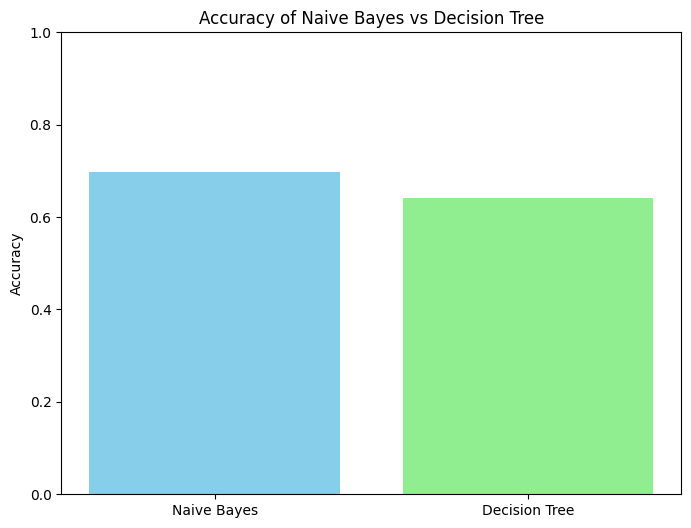

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
file_path = 'Titanic-Dataset.csv'
titanic_df = pd.read_csv(file_path)

# Select features and target
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

# Handle missing values by filling them with the mean of the column
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].mean(), inplace=True)

# Define the feature matrix and target vector
X = titanic_df[features]
y = titanic_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the classifiers
dtc = DecisionTreeClassifier(random_state=42)
gnb = GaussianNB()

# Fit the models on the training data
dtc.fit(X_train, y_train)
gnb.fit(X_train, y_train)

# Predict the classes on the test set
dtc_preds = dtc.predict(X_test)
gnb_preds = gnb.predict(X_test)

# Calculate accuracy for each model
dtc_accuracy = accuracy_score(y_test, dtc_preds)
gnb_accuracy = accuracy_score(y_test, gnb_preds)

# Plotting the accuracy of both classifiers
models = ['Naive Bayes', 'Decision Tree']
accuracies = [gnb_accuracy, dtc_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy of Naive Bayes vs Decision Tree')
plt.show()


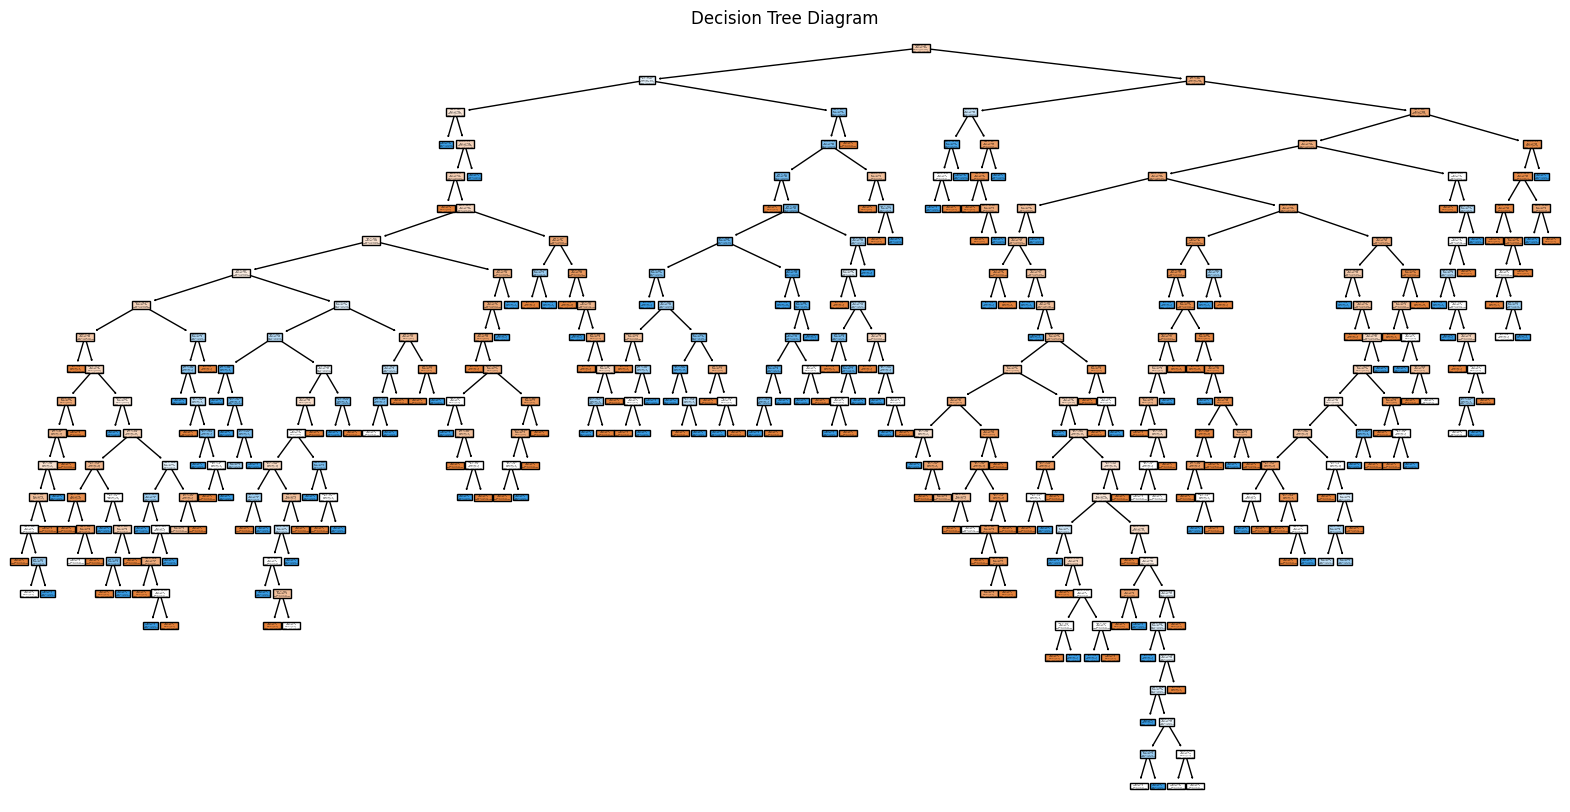

In [ ]:
# Plotting the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dtc, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree Diagram")
plt.show()
